In [1]:
import numpy as np
import pandas as pd
from data import read_data, removing_duplicates
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from itertools import product
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from scipy.stats import randint
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### read data

In [2]:
f = "./data/1-s2.0-S1364032122009844-mmc1.xlsx"
df = read_data(f)
df = removing_duplicates(df)
df

,Brine,%wt of salt,CaBr2,CaCl2,K2CO3,KBr,KCl,KHCOO,MgBr2,MgCl2,...,Ca⁺⁺,Mg⁺⁺,Cl⁻,Br⁻,I⁻,HCOO⁻,CO₃⁻⁻,SO₄⁻⁻,P (MPa),T (K)
0,NaCl,11.731824,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.03936,0.000000,0.0,0.0,0.0,0.0,2.69,268.30
1,NaCl,11.731824,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.03936,0.000000,0.0,0.0,0.0,0.0,3.53,271.05
2,NaCl,11.731824,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.03936,0.000000,0.0,0.0,0.0,0.0,4.50,273.25
3,NaCl,11.731824,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.03936,0.000000,0.0,0.0,0.0,0.0,5.29,274.75
4,NaCl,11.731824,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.03936,0.000000,0.0,0.0,0.0,0.0,5.98,275.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,ZnBr2,15,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.00000,0.027843,0.0,0.0,0.0,0.0,6.14,278.80
983,ZnBr2,15,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.00000,0.027843,0.0,0.0,0.0,0.0,6.88,279.80
984,ZnBr2,15,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.00000,0.027843,0.0,0.0,0.0,0.0,7.80,280.90
985,ZnBr2,15,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.00000,0.027843,0.0,0.0,0.0,0.0,8.27,281.50


In [3]:
subset_columns = df.columns[:30]
subset_columns

Index(['Brine', '%wt of salt', 'CaBr2', 'CaCl2', 'K2CO3', 'KBr', 'KCl',
       'KHCOO', 'MgBr2', 'MgCl2', 'Na2SO4', 'NaBr', 'NaCl', 'NaHCOO', 'NaI',
       'NH4Cl', 'ZnBr2', 'Na⁺', 'K⁺', 'NH₄⁺', 'Zn⁺', 'Ca⁺⁺', 'Mg⁺⁺', 'Cl⁻',
       'Br⁻', 'I⁻', 'HCOO⁻', 'CO₃⁻⁻', 'SO₄⁻⁻', 'P (MPa)'],
      dtype='object')

In [4]:
duplicate_mask = df.duplicated(subset=subset_columns, keep='first')
df = df[~duplicate_mask]
df

,Brine,%wt of salt,CaBr2,CaCl2,K2CO3,KBr,KCl,KHCOO,MgBr2,MgCl2,...,Ca⁺⁺,Mg⁺⁺,Cl⁻,Br⁻,I⁻,HCOO⁻,CO₃⁻⁻,SO₄⁻⁻,P (MPa),T (K)
0,NaCl,11.731824,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.03936,0.000000,0.0,0.0,0.0,0.0,2.69,268.30
1,NaCl,11.731824,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.03936,0.000000,0.0,0.0,0.0,0.0,3.53,271.05
2,NaCl,11.731824,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.03936,0.000000,0.0,0.0,0.0,0.0,4.50,273.25
3,NaCl,11.731824,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.03936,0.000000,0.0,0.0,0.0,0.0,5.29,274.75
4,NaCl,11.731824,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.03936,0.000000,0.0,0.0,0.0,0.0,5.98,275.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,ZnBr2,15,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.00000,0.027843,0.0,0.0,0.0,0.0,6.14,278.80
983,ZnBr2,15,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.00000,0.027843,0.0,0.0,0.0,0.0,6.88,279.80
984,ZnBr2,15,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.00000,0.027843,0.0,0.0,0.0,0.0,7.80,280.90
985,ZnBr2,15,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.00000,0.027843,0.0,0.0,0.0,0.0,8.27,281.50


### spliting additional testing data

In [5]:
df_new = df[df.iloc[:, 0] != 'MgBr2']
df_mgbr2 = df[df.iloc[:, 0] == 'MgBr2']

### features and target selection

In [6]:
select_columns = ['Na⁺','K⁺', 'NH₄⁺', 'Zn⁺', 'Ca⁺⁺', 
             'Mg⁺⁺', 'Cl⁻', 'Br⁻', 'I⁻', 'HCOO⁻',
             'CO₃⁻⁻', 'SO₄⁻⁻', 'P (MPa)','T (K)']
df_new = df_new[select_columns]
df_mgbr2 = df_mgbr2[select_columns]

X = df_new[select_columns[:-1]]
y = df_new[select_columns[-1]]

X_mgbr2 = df_mgbr2[select_columns[:-1]]
y_mgbr2 = df_mgbr2[select_columns[-1]]
# X,y

### Data splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=22)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((749, 13), (749,), (188, 13), (188,))

### A 5-fold Cross-Validation (CV) for Hyperparameter optimization

In [8]:
# 定义MLP回归器
et_regressor = ExtraTreesRegressor()
# 定义参数网格
param_dist = {
    'max_depth': randint(1, 20),  # Random integer between 1 and 20
    'min_samples_split': randint(2, 20),  # Random integer between 2 and 20
    'min_samples_leaf': randint(1, 20)  # Random integer between 1 and 20
}
search_type = "random"
if search_type == "grid":    
    # 创建GridSearchCV对象
    grid_search = GridSearchCV(et_regressor, param_dist, cv=5,scoring='neg_root_mean_squared_error')
    grid_search.fit(X_train, y_train)
    # 打印最佳参数
    print(f"Best parameters ({search_type}):",grid_search.best_params_)
    print("Best parameters score:",grid_search.best_score_)
elif search_type == "random":
    # 创建RandomizedSearchCV对象
    random_search = RandomizedSearchCV(estimator=et_regressor, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error')
    random_search.fit(X_train, y_train)
    # 打印最佳参数
    print(f"Best parameters ({search_type}):",random_search.best_params_)
    print("Best parameters score:",random_search.best_score_)
# elif search_type == "bayes":
#     # 创建RandomizedSearchCV对象
#     bayes_search = BayesSearchCV(et_regressor, param_grid, n_iter=10,cv=5,scoring='neg_root_mean_squared_error')
#     bayes_search.fit(X_train, y_train)
#     # 打印最佳参数
#     print(f"Best parameters ({search_type}):",bayes_search.best_params_)
#     print("Best parameters score:",bayes_search.best_score_)

Best parameters (random): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best parameters score: -1.8432142750691534


### 缩放数据

In [9]:
# transfer = StandardScaler()
# X_train = transfer.fit_transform(X_train)
# X_test = transfer.fit_transform(X_test)
# # X_train
scale = True # 在make_pipeline中缩放

### 训练与预测

R^2 (train) = 0.9294293470934113
R^2 (test) = 0.8564007605201066

>>> add a fig successfully !



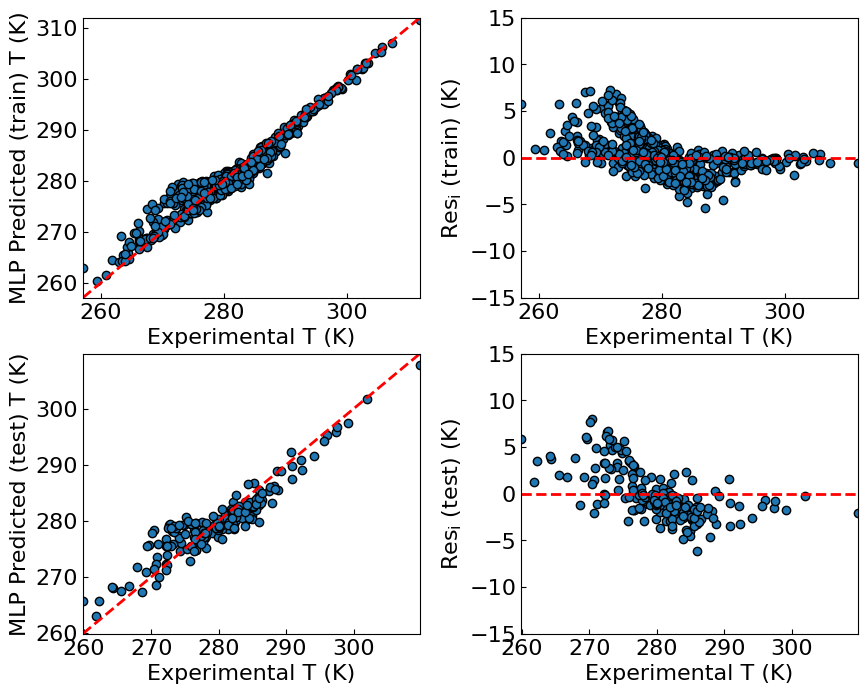

In [16]:
import matplotlib.pyplot as plt
import fastdataing as fd
from tqdm import tqdm
et_regressor = ExtraTreesRegressor(max_depth=10, 
                   # random_state=2024, 
                   # max_iter=1000,
                   min_samples_split = 3,
                   min_samples_leaf = 1,
                  )
if scale == False:
    unscaled_clf = make_pipeline(PCA(n_components=2), et_regressor)
    unscaled_clf.fit(X_train, y_train)
    y_predict = unscaled_clf.predict(X_train)
    r2 = unscaled_clf.score(X_train,y_train)
    print(f"R^2 (train) = {r2}")
    y_predict_test = unscaled_clf.predict(X_test)
    r2_test = std_clf.score(X_test,y_test)
    print(f"R^2 (test) = {r2_test}")
else:
    std_clf = make_pipeline(StandardScaler(), PCA(n_components=None), et_regressor)
    std_clf.fit(X_train, y_train)
    y_predict = std_clf.predict(X_train)
    r2 = std_clf.score(X_train,y_train)
    print(f"R^2 (train) = {r2}")
    y_predict_test = std_clf.predict(X_test)
    r2_test = std_clf.score(X_test,y_test)
    print(f"R^2 (test) = {r2_test}")

# # -------------- rmse, 5 fold cv, 20 trails ----------------
# num_trials = 20 
# rmse_scores = []
# rmse_scores_test = []
# # 缩放
# transfer = StandardScaler()
# X_train = transfer.fit_transform(X_train)
# X_test = transfer.fit_transform(X_test)
# # 5 fold cv rmse
# for _ in tqdm(range(num_trials)):
#     rmse = cross_val_score(mlp,X_train,y_train,cv=5,scoring="neg_root_mean_squared_error")
#     rmse_scores.append(np.mean(rmse))
#     rmse_test = cross_val_score(mlp,X_test,y_test,cv=5,scoring="neg_root_mean_squared_error")
#     rmse_scores_test.append(np.mean(rmse_test))
# print(f"RMSE---5 fold cv = {-np.mean(rmse_scores)}")
# y_predict = cross_val_predict(mlp,X_train,y_train,cv=5)
# print(f"RMSE_test---5 fold cv = {-np.mean(rmse_scores_test)}")
# y_predict_test = cross_val_predict(mlp,X_test,y_test,cv=5)

# # -------------- plot ----------------
fig = fd.add_fig(figsize=(10,8),size=16,family="DejaVu Sans")
plt.subplots_adjust(wspace=0.3)

ax = fd.add_ax(fig,subplot=(2,2,1))
ax.scatter(y_train,y_predict,edgecolors=(0, 0, 0))
ax.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'r--',lw=2)
ax.set_xlim(y_train.min(),y_train.max())
ax.set_ylim(y_train.min(),y_train.max())
ax.set_xlabel("Experimental T (K)")
ax.set_ylabel("MLP Predicted (train) T (K)")

ay = fd.add_ax(fig,subplot=(2,2,2))
ay.scatter(y_train,y_predict-y_train,edgecolors=(0, 0, 0))
ay.plot([y_train.min(),y_train.max()],[0,0],'r--',lw=2)
ay.set_xlim(y_train.min(),y_train.max())
ay.set_ylim(-15,15)
ay.set_xlabel("Experimental T (K)")
ay.set_ylabel(r"$\regular Res_i$ (train) (K)")
# ----------- test ------------
az = fd.add_ax(fig,subplot=(2,2,3))
az.scatter(y_test,y_predict_test,edgecolors=(0, 0, 0))
az.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
az.set_xlim(y_test.min(),y_test.max())
az.set_ylim(y_test.min(),y_test.max())
az.set_xlabel("Experimental T (K)")
az.set_ylabel("MLP Predicted (test) T (K)")

aa = fd.add_ax(fig,subplot=(2,2,4))
aa.scatter(y_test,y_predict_test-y_test,edgecolors=(0, 0, 0))
aa.plot([y_test.min(),y_test.max()],[0,0],'r--',lw=2)
aa.set_xlim(y_test.min(),y_test.max())
aa.set_ylim(-15,15)
aa.set_xlabel("Experimental T (K)")
aa.set_ylabel(r"$\regular Res_i$ (test) (K)")

plt.show()